## TF中图像编码的处理

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

[[[ 30  31  52]
  [ 30  31  52]
  [ 30  31  52]
  ...
  [ 25  23  37]
  [ 25  23  37]
  [ 25  23  37]]

 [[ 31  32  53]
  [ 31  32  53]
  [ 31  32  53]
  ...
  [ 24  22  36]
  [ 25  23  37]
  [ 25  23  37]]

 [[ 33  34  55]
  [ 32  33  54]
  [ 32  33  54]
  ...
  [ 24  22  36]
  [ 24  22  36]
  [ 25  23  37]]

 ...

 [[178 176 190]
  [188 186 200]
  [203 201 215]
  ...
  [182 147 141]
  [181 146 140]
  [181 146 140]]

 [[184 182 196]
  [189 187 201]
  [202 200 214]
  ...
  [181 146 140]
  [182 147 141]
  [183 148 142]]

 [[184 182 196]
  [180 178 192]
  [182 180 194]
  ...
  [181 146 140]
  [183 148 142]
  [184 149 143]]]


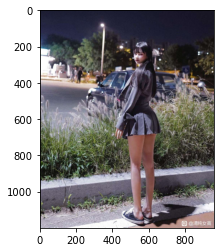

In [62]:
# 获取图像原始数据
image_raw_data = tf.gfile.FastGFile("Image/IMG_0722.jpeg", "rb").read()

with tf.Session() as session:
    # 对图像进行jpeg格式解码，得到图像三维矩阵
    image_data = tf.image.decode_jpeg(image_raw_data)
    # tf.image.decode_png()

    # 解码之后得到一个张量，使用eval()进行取值
    print(image_data.eval())

    # 可视化
    plt.imshow(image_data.eval())
    plt.show()

## 图像缩放

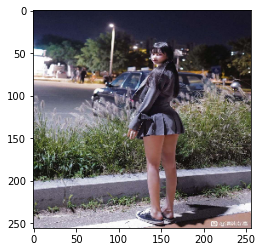

In [63]:
# 双线性插值法（ResizeMethod.BILINEAR，默认设置），对应method=0
with tf.Session() as session:
    # 用双线性插值法将图像缩放为指定尺寸
    resized0 = tf.image.resize_images(image_data, [256, 256], method=0)

    # TensorFlow的函数处理图片后存储的数据时float32格式的，需要转换为unit8才能正确打印图片
    resized0 = np.asarray(resized0.eval(), dtype="uint8")
    plt.imshow(resized0)
    plt.show()

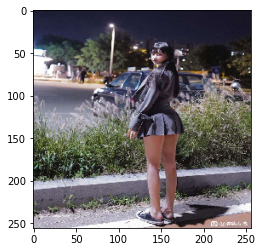

In [64]:
# 最近邻插值法（NEAREST_NEIGHBOR），对应method=1
with tf.Session() as session:
    # 用双线性插值法将图像缩放为指定尺寸
    resized1 = tf.image.resize_images(image_data, [256, 256], method=1)

    # TensorFlow的函数处理图片后存储的数据时float32格式的，需要转换为unit8才能正确打印图片
    resized1 = np.asarray(resized1.eval(), dtype="uint8")
    plt.imshow(resized1)
    plt.show()

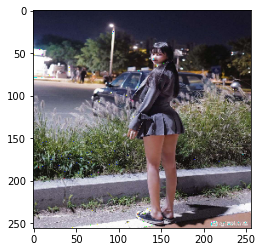

In [65]:
# 双立方插值法（BICUBIC），对应method=2
with tf.Session() as session:
    # 用双线性插值法将图像缩放为指定尺寸
    resized2 = tf.image.resize_images(image_data, [256, 256], method=2)

    # TensorFlow的函数处理图片后存储的数据时float32格式的，需要转换为unit8才能正确打印图片
    resized2 = np.asarray(resized2.eval(), dtype="uint8")
    plt.imshow(resized2)
    plt.show()

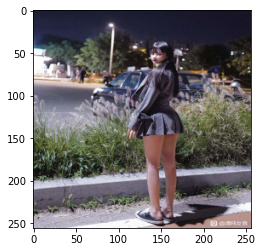

In [66]:
# 像素区域插值法（AREA），对应method=3
with tf.Session() as session:
    # 用双线性插值法将图像缩放为指定尺寸
    resized3 = tf.image.resize_images(image_data, [256, 256], method=3)

    # TensorFlow的函数处理图片后存储的数据时float32格式的，需要转换为unit8才能正确打印图片
    resized3 = np.asarray(resized3.eval(), dtype="uint8")
    plt.imshow(resized3)
    plt.show()

## 图像裁剪或填充

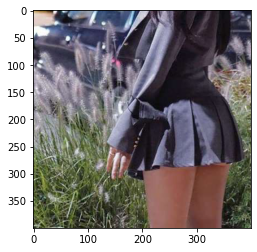

In [67]:
# 如果目标图像尺寸小于原始图像尺寸，则在中心位置剪裁，反之则用黑色像素进行填充
with tf.Session() as session:
    image_data = tf.image.decode_jpeg(image_raw_data)

    # 输出400*400大小的图像，将会进行裁剪
    croped = tf.image.resize_image_with_crop_or_pad(image_data, 400, 400)
    plt.imshow(croped.eval())
    plt.show()

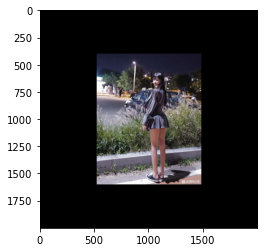

In [68]:
with tf.Session() as session:
    image_data = tf.image.decode_jpeg(image_raw_data)

    # 输出2000*2000的图像，比原图像大，则会用黑色像素填充
    croped = tf.image.resize_image_with_crop_or_pad(image_data, 2000, 2000)
    plt.imshow(croped.eval())
    plt.show()

## 随机裁剪（tf.random_crop()）

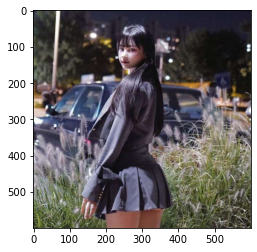

In [69]:
with tf.Session() as session:
    image_data = tf.image.decode_jpeg(image_raw_data)
    random_cropped1 = tf.random_crop(image_data, [600, 600, 3])
    plt.imshow(random_cropped1.eval())
    plt.show()

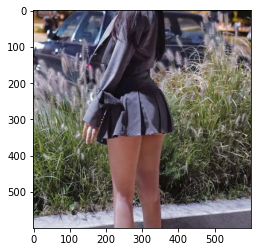

In [70]:
# 再次随机裁剪，验证随机性
with tf.Session() as session:
    image_data = tf.image.decode_jpeg(image_raw_data)
    random_cropped2 = tf.random_crop(image_data, [600, 600, 3])
    plt.imshow(random_cropped2.eval())
    plt.show()

## 水平翻转（tf.image.flip_left_right()）

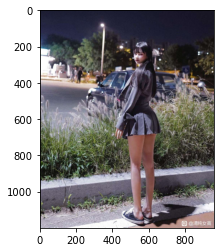

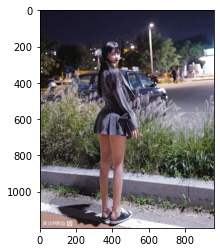

In [71]:
with tf.Session() as session:
    image_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(image_data.eval())
    # plt.axis("off")
    plt.show()

    flip_left_right = tf.image.flip_left_right(image_data)
    plt.imshow(flip_left_right.eval())
    # plt.axis("off")
    plt.show()

## 上下翻转（tf.image.flip_up_down()）

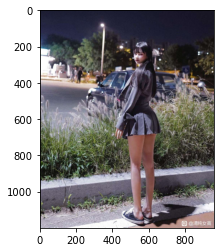

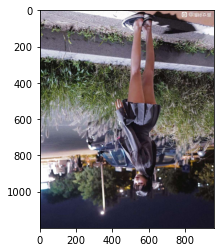

In [72]:
with tf.Session() as session:
    image_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(image_data.eval())
    # plt.axis("off")
    plt.show()

    flip_up_down = tf.image.flip_up_down(image_data)
    plt.imshow(flip_up_down.eval())
    # plt.axis("off")
    plt.show()

## 改变对比度（tf.image.random_contrast()）

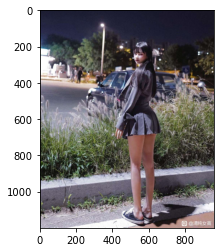

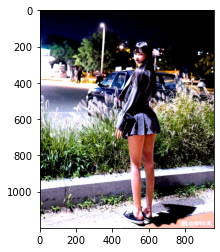

In [80]:
with tf.Session() as session:
    image_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(image_data.eval())
    plt.show()

    # 将图像的对比度降低为原来的1/2
    # contrast = tf.image.adjust_contrast(image_data, 0.5)

    # 将图像的对比度提高至原来的5倍
    # contrast = tf.image.adjust_contrast(image_data,0.5)

    # 在[lower, upper]范围随机调整图像对比度
    contrast = tf.image.random_contrast(image_data, lower=0.2, upper=3)

    plt.imshow(contrast.eval())
    plt.show()

## 白化处理

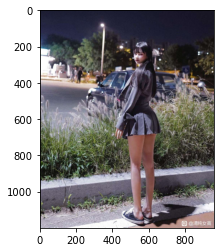

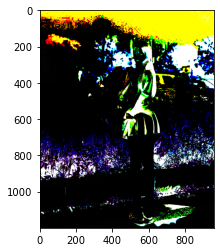

In [82]:
# 将图像的像素值转化成零均值和单位方案
with tf.Session() as session:
    image_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(image_data.eval())
    plt.show()

    standardization = tf.image.per_image_standardization(image_data)
    plt.imshow(np.asarray(standardization.eval(), dtype="uint8"))
    plt.show()